[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zaidalyafeai/Notebooks/blob/master/QuickDraw10.ipynb)

##  [@Zaid Alyafeai](https://twitter.com/zaidalyafeai)




# Introduction 

In this notebook we provide QuickDraw10 as an alternative for MNIST. A script is provided to download and load a preprocessed dataset for 10 classes with training and testing split. Also, a simple CNN model is implemented for training and testing. 

# MNIST

MNIST has been popular in the past few years. It contains images of hand-drawn digits. Each image is gray-scale dimension 28 x 28.  The training set contains 60000 images and the testing set contains 10,000 images. The graph below shows the dataset usage in the literature. 
![alt text](https://pbs.twimg.com/media/Cy8Bx8qW8AAnBCT.jpg)

# It is Good and Bad 

## pros

*   It is like the "Hello World" in machine learning. 
*   The dataset is really small with where each image has a dimnesion 28 x 28.
*   It can be used as a toy example for testing new models. 



## cons

*   No great variablitiy in the data for each class. The number of strokes is limited for each drawn digit. 
*  Most MNIST pairs could be distinguised by just one pixel. See [this](https://gist.github.com/dgrtwo/aaef94ecc6a60cd50322c0054cc04478). 
*  The data is overused in both universities and the literature. 



# QuickDraw

This dataset was collected by Google from people drawing different objects. The dataset is a collection of 50 million drawings from 345 different objects that is available publically for everyone. 



![alt text](https://raw.githubusercontent.com/googlecreativelab/quickdraw-dataset/master/preview.jpg)

# Is it Good ? 

People from all around the world are drawing the objects. There are a huge number of possibilites to draw a single object. Not to mention that the number of strokes varies greatly as the complexity of the object increases. 


# Creating QuickDraw10

This script contains the code to download the dataset for 10 classes, shuffle the data and split it into training and testing. The script contains other methods (t-SNE plotting for instance).

In [1]:
!wget https://raw.githubusercontent.com/zaidalyafeai/QuickDraw10/master/quick_draw10.py

--2018-10-18 21:53:13--  https://raw.githubusercontent.com/zaidalyafeai/QuickDraw10/master/quick_draw10.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2815 (2.7K) [text/plain]
Saving to: ‘quick_draw10.py’

quick_draw10.py     100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-10-18 21:53:14 (27.0 MB/s) - ‘quick_draw10.py’ saved [2815/2815]



# Imports

In [0]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
from quick_draw10 import download_and_load, plot_tsne
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Load the Data 

In [3]:
x_train, y_train, x_test, y_test, class_names = download_and_load()

downloading ...
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cloud.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/pants.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/umbrella.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/table.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/clock.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/scissors.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cup.npy
loading ...
Training Data :  80000
Testing  Data :  20000


In [4]:
class_names

['cloud',
 'sun',
 'pants',
 'umbrella',
 'table',
 'ladder',
 'eyeglasses',
 'clock',
 'scissors',
 'cup']

# Visualization

In [0]:
def visualize_classes():
  for i in range(0, 10):
    img_batch = x_train[y_train == i][0:10]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img)

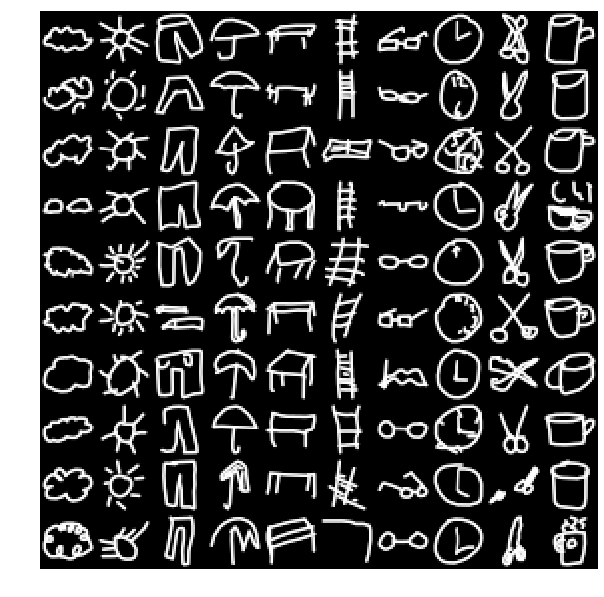

In [6]:
visualize_classes()

## Labels distirubtion

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


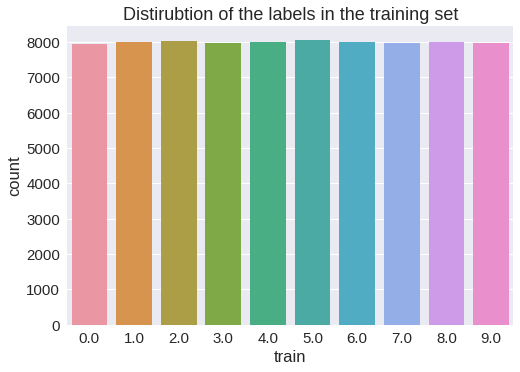

In [7]:
data = {}
data['train'] = y_train
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'train', data=df).set_title("Distirubtion of the labels in the training set")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


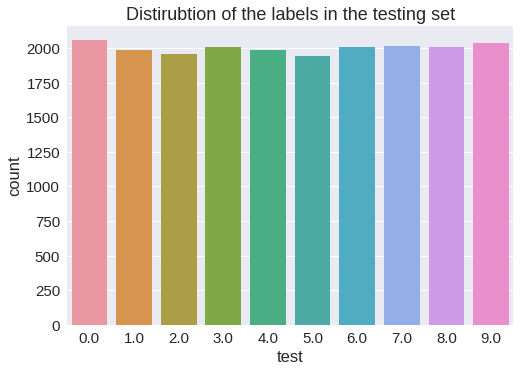

In [8]:
data = {}
data['test'] = y_test
df = pd.DataFrame.from_dict(data)
ax = sns.countplot(x = 'test', data=df).set_title("Distirubtion of the labels in the testing set")

## T-SNE

plot a t-sne distirubtion of 1000 sample from the training set 

calculating tsne ...


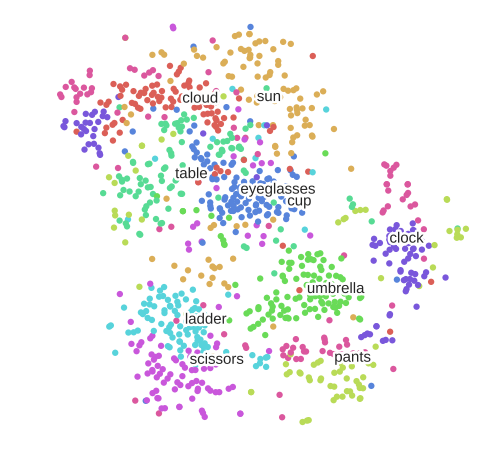

In [9]:
X = np.reshape(x_train, (x_train.shape[0], 28 * 28))[0:1000]
y = y_train[0:1000]
plot_tsne(X, y)

# Preprocess the Data 

In [0]:
image_size = 28

# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, len(class_names))
y_test = keras.utils.to_categorical(y_test, len(class_names))

# The Model 

In [11]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(len(class_names), activation='softmax')) 
# Train model
adam = tf.train.AdamOptimizer()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________

# Training 

In [13]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, epochs=5)

Train on 72000 samples, validate on 8000 samples
Epoch 1/5
72000/72000 [==============================] - 3s 47us/step - loss: 0.1298 - acc: 0.9626 - val_loss: 0.1726 - val_acc: 0.9521
Epoch 2/5
72000/72000 [==============================] - 3s 47us/step - loss: 0.1189 - acc: 0.9652 - val_loss: 0.1614 - val_acc: 0.9545
Epoch 3/5
72000/72000 [==============================] - 3s 47us/step - loss: 0.1101 - acc: 0.9679 - val_loss: 0.1538 - val_acc: 0.9580
Epoch 4/5
72000/72000 [==============================] - 3s 47us/step - loss: 0.1008 - acc: 0.9703 - val_loss: 0.1619 - val_acc: 0.9549
Epoch 5/5
72000/72000 [==============================] - 3s 47us/step - loss: 0.0901 - acc: 0.9732 - val_loss: 0.1543 - val_acc: 0.9587


# Testing 

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 95.89%


# Check Some Incorrect Labeling

True Label  cup
Pred Label  pants


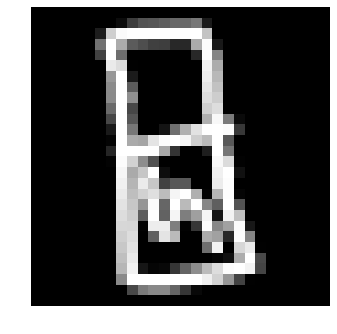

In [98]:
#get predictions and true labels
yhat = np.argmax(model.predict(x_test), axis = 1)
y    = np.argmax(y_test, axis = 1)

#get the indices of the bad labels 
bad_labels = np.argwhere((y == yhat) == False).squeeze()

#choose a random index with incorrect label 
idx = np.random.choice(bad_labels)

print('True Label ',class_names[y[idx]])
print('Pred Label ',class_names[yhat[idx]])
plt.imshow(x_test[idx].squeeze())
plt.axis('off')
plt.show()

# References

* [Fashion-MNIST](https://hanxiao.github.io/2017/08/26/Fashion-MNIST-a-Drop-In-Replacement-of-MNIST-for-Benchmarking-Machine-Learning-Algorithms/)

* [t-SNE tutorial](https://github.com/oreillymedia/t-SNE-tutorial)

* [The quickdraw projec](https://github.com/googlecreativelab/quickdraw-dataset#projects-using-the-dataset)